In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np

In [2]:
df = pd.read_csv('./assignments_from_pool_Quality++.tsv', sep="\t")

In [3]:
df = df.drop(columns=['GOLDEN:ad', 'GOLDEN:not_ad', 'GOLDEN:ban_insult_hard', 'GOLDEN:ban_shock_content', 'GOLDEN:ban_shock_content',
'HINT:text', 'HINT:default_language'])


In [4]:
df = df.fillna(0)
def f(row):
    if row['OUTPUT:ad'] == 'yes':
        val = 'ad'
    elif row['OUTPUT:not_ad'] != 0:
        val = 'not_ad'
    elif row['OUTPUT:ban_insult_hard'] != 0:
        val = 'ban_insult_hard'
    elif row['OUTPUT:ban_shock_content'] != 0:
        val = 'ban_shock_content'    
    else:
        val = ' '
    return val

df['OUTPUT:label'] = df.apply(f, axis=1)



In [5]:
df.head()

,INPUT:label,INPUT:comment,INPUT:task-id,OUTPUT:ad,OUTPUT:not_ad,OUTPUT:ban_insult_hard,OUTPUT:ban_shock_content,ASSIGNMENT:worker_id,OUTPUT:label
0,ban_shock_content,Чьи кости нашли строители под Карлинским. След...,351,no,0,0,True,c9ab6876573089328e56f514b0b77f5b,ban_shock_content
1,ad,ФИЗИОТЕРАПИЯ В ТУЛЕ. Реабилитационный центр ФИ...,111,yes,0,0,0,c9ab6876573089328e56f514b0b77f5b,ad
2,not_ad,Мэр сегодня посетил насосно-перекачивающую ста...,451,no,True,0,0,c9ab6876573089328e56f514b0b77f5b,not_ad
3,not_ad,На сев-востоке ост.охотничья с воскресенье упа...,495,no,True,0,0,c9ab6876573089328e56f514b0b77f5b,not_ad
4,ad,Снижение цен на мебельный щит. Успейте восполь...,35,yes,0,0,0,c9ab6876573089328e56f514b0b77f5b,ad


In [6]:
df = df.drop(columns=['OUTPUT:ad', 'OUTPUT:not_ad', 'OUTPUT:ban_insult_hard', 'OUTPUT:ban_shock_content'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   INPUT:label           1610 non-null   object
 1   INPUT:comment         1610 non-null   object
 2   INPUT:task-id         1610 non-null   int64 
 3   ASSIGNMENT:worker_id  1610 non-null   object
 4   OUTPUT:label          1610 non-null   object
dtypes: int64(1), object(4)
memory usage: 63.0+ KB


In [8]:
#сохранения в tsv
df.to_csv('Quality++.tsv', sep="\t", index=False)

In [9]:
df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]

1390

In [10]:
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0]

220

In [11]:
# 14.5% неправильных ответов
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0] / 1500

0.14666666666666667

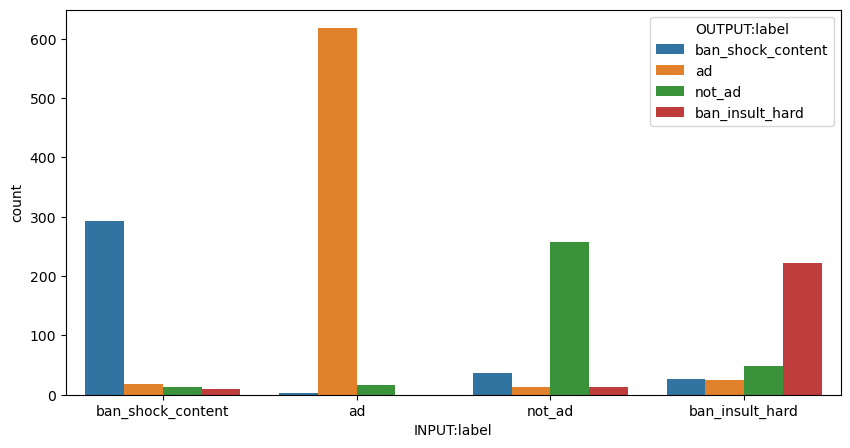

In [12]:
# 
_, axes = plt.subplots(1, sharey=True, figsize=(10,5))


sns.countplot(x='INPUT:label', hue='OUTPUT:label', data=df);